In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [76]:
import pandas as pd
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def location_pickle_to_df(file_name):
    #get the hilera id
    n_hilera = file_name.split("_")[1]
    
    #Read the pickle as dict
    df = pd.read_pickle(os.path.join(PICKLE_DIR,file_name))
    
    #Transform to pickle to dataframe
    df = pd.DataFrame(df.items(), columns=['id_racimo', 'info_racimo'])
    df['hilera_id'] = n_hilera
    
    #Split the info racimo and concat in a new data frame
    tmp = pd.DataFrame(df['info_racimo'].tolist(), index=df.index, columns=['frame_count','x_center','distance'])
    df = pd.concat([df['hilera_id'],df['id_racimo'],tmp],axis=1)
    
    return df

### Group by Frame Count and Ploting detection by frames

In [46]:
PICKLE_DIR = "/content/gdrive/MyDrive/grapes_project/samples/uvas/stuff/pickles/dcomplete_pgrapes/location_pickles/"
file_name = "locations_2_2_37_2.pkl"
df = location_pickle_to_df(file_name)

# Transform to detection per frame
df['detections'] = 1
df = df[['frame_count', 'detections']]
df1 = df.copy()
df = df.groupby("frame_count").sum().reset_index()
df

,frame_count,detections
0,23,1
1,25,1
2,35,1
3,51,1
4,93,1
...,...,...
372,7727,1
373,7737,1
374,7755,1
375,7845,1


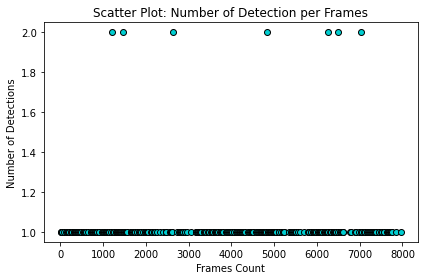

In [75]:
num_bins = 12
x = list(df['frame_count'])
y = list(df['detections'])

fig, ax = plt.subplots()

ax.scatter(x,y,color = 'darkturquoise', edgecolor = 'black')
ax.set_xlabel('Frames Count')
ax.set_ylabel('Number of Detections')
ax.set_title(r'Scatter Plot: Number of Detection per Frames')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Plot the histograms

In [109]:
8000/50

160.0

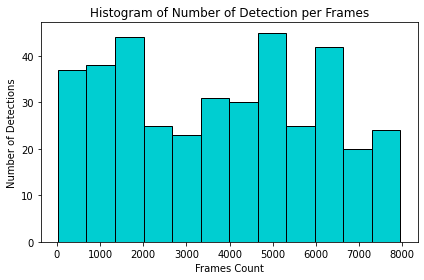

In [71]:
num_bins = 12
x = list(df1['frame_count'])

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, color = 'darkturquoise', edgecolor = 'black')

ax.set_xlabel('Frames Count')
ax.set_ylabel('Number of Detections')
ax.set_title(r'Histogram of Number of Detection per Frames')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()